# The Deuteron
This notebook demonstrates solution of simple finite square well model for the deuteron. For use with Section 3 of the Nuclear Physics part of PH666 (Nuclear and Particle Physics) at the University of Kent. Written by Mike Hughes, August 2021


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import root_scalar


# Part 1 - Calculate Well Depth
We numerically solve the characteristic equation Kcot(Kr0) = −k derived in the notes to dermine the value 
of the well potential, V_0. We use the known binding energy and reduced mass (m_p / 2) and our guess at the 
well radius of 2.1 fm.

In [154]:
# PART 1 - CALCULATE WELL DEPTH
hbar = 6.63 * 10**-34 / (2 * math.pi)     # Js
wellRadius = 2.1 * 10**-15                # fm
bindEnergy = 2.225 * 10**6 * 1.6*10**-19  # J
redMass = 1.67*10**-27 /2                 # kg

# This is the function we want to find the root of to dermine the well depth which satisfies the equation
def eqnResidual(wellDepth, hbar, bindEnergy, redMass):
    # Calculate the wavenumbers inside (K) and outside (k) the well
    k = math.sqrt(2 * redMass * bindEnergy) / hbar
    K = math.sqrt(2 * redMass * (wellDepth - bindEnergy)) / hbar
    # Return the residual Kcot(kr_0) + k)
    return (K * 1/math.tan(K * wellRadius) + k) 

# Guess well depth is between binding energy and 20 times binding Energy.
res = root_scalar(eqnResidual, bracket = (1.001 * bindEnergy, 20 * bindEnergy), args=(hbar, bindEnergy, redMass), xtol = 10**-15)
wellDepth = res.root
print("Found well potential of: ", round(wellDepth / (1.6 * 10**-19) / 10**6,2), " MeV" )


Found well potential of:  33.87  MeV


# Part 2 - Plot Wavefunction
Using our well depth found above, we now plot the wavefunction.

Text(0, 0.5, 'Wavefunction (arb units)')

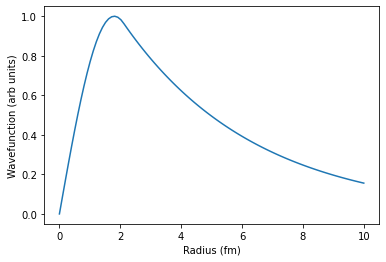

In [160]:
# PART 2 - PLOTTING THE WAVEFUNCTION OF THE DEUTERON

# Plotting parameters
maxRadius = 10 * 10**-15  # max radius to plot
nPoints = 100             # number of data points in plot
wavefunction = np.zeros(nPoints)

# These are the points we will plot the wavefunction for
radialPoint = np.linspace(0, maxRadius, nPoints)

# We are setting a, the constant in front of the sin term, to 1, then we figure out the
# value of b, the constant in front of the exp term, so that the value are the same
# at the boundary (step in the well)
b =  np.sin(K * wellRadius) / np.exp(-k * wellRadius)

# Calculate the wavenumbers inside (K) and outside (k) the well
k = np.sqrt(2 * redMass * bindEnergy) / hbar
K = np.sqrt(2 * redMass * (wellDepth - bindEnergy)) / hbar

# Calculate wavefunction for both inside and outside well
wavefunction[radialPoint < wellRadius] =  np.sin(K * radialPoint[radialPoint < wellRadius])        # Points inside well
wavefunction[radialPoint >= wellRadius] = b * np.exp(-k * radialPoint[radialPoint >= wellRadius])  # Points outside well

# Display
plt.plot(radialPoint * 10**15, wavefunction)
plt.xlabel("Radius (fm)")
plt.ylabel("Wavefunction (arb units)")

# Part 3 - Plot Probability Density
Using our well depth found above, we now plot the wavefunction.

Text(0, 0.5, 'Probability Density')

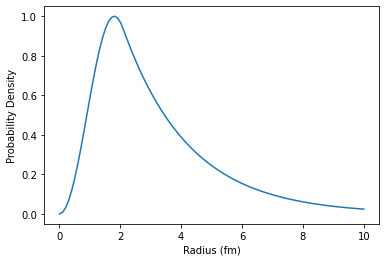

In [162]:
# Plotting parameters
maxRadius = 10 * 10**-15  # max radius to plot
nPoints = 100             # number of data points in plot

# Display
plt.plot(radialPoint * 10**15, wavefunction**2)
plt.xlabel("Radius (fm)")
plt.ylabel("Probability Density")